In [1]:
import pandas as pd  # excel of python
import numpy as np # nuemrical computations (arthemetic operations)
import nltk # NLP (Text Minings)
import re # regular expressions for searching/ slicing/indexing text from tweet
import csv # csv operations
import seaborn as sns #visualizations 

In [1]:
tweets=pd.read_csv('convertcsv.csv')

NameError: name 'pd' is not defined

In [3]:
#tweets[['full_text']].head()
#tweets.head(100)
tweets.tail(50)

,created_at,id,id_str,full_text,truncated,display_text_range/0,display_text_range/1,entities/urls/0/url,entities/urls/0/expanded_url,entities/urls/0/display_url,...,quoted_status/entities/urls/1/url,quoted_status/entities/urls/1/expanded_url,quoted_status/entities/urls/1/display_url,quoted_status/entities/urls/1/indices/0,quoted_status/entities/urls/1/indices/1,entities/urls/2/url,entities/urls/2/expanded_url,entities/urls/2/display_url,entities/urls/2/indices/0,entities/urls/2/indices/1
2815,Thu Sep 14 19:31:55 +0000 2017,908413019050463200,908413019050463232,Bernie Sanders is pushing hard for a single pa...,False,0,107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,Thu Sep 14 19:18:14 +0000 2017,908409572943126500,908409572943126528,Spoke to President of Mexico to give condolenc...,False,0,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,Thu Sep 14 19:04:22 +0000 2017,908406085308096500,908406085308096512,Just left Florida for D.C. The people and spir...,False,0,131,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,Thu Sep 14 11:05:55 +0000 2017,908285679335034900,908285679335034880,Am leaving now for Florida to see our GREAT fi...,False,0,139,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2819,Thu Sep 14 10:35:41 +0000 2017,908278070611779600,908278070611779585,...They have been in our country for many year...,False,0,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,Thu Sep 14 10:28:41 +0000 2017,908276308265795600,908276308265795585,"Does anybody really want to throw out good, ed...",False,0,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,Thu Sep 14 10:20:58 +0000 2017,908274366739345400,908274366739345409,"The WALL, which is already under construction ...",False,0,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,Thu Sep 14 10:11:36 +0000 2017,908272007011283000,908272007011282944,No deal was made last night on DACA. Massive b...,False,0,138,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,Thu Sep 14 02:52:34 +0000 2017,908161523180286000,908161523180285953,"The ""deplorables"" came back to haunt Hillary.T...",False,0,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,Thu Sep 14 02:47:23 +0000 2017,908160218995068900,908160218995068928,Crooked Hillary Clinton blames everybody (and ...,False,0,138,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    
    return tweet

In [5]:
# Apply function to Tweet column

tweets['full_text'] = tweets['full_text'].apply(clean_tweets)

In [2]:
nltk.download('stopwords')


NameError: name 'nltk' is not defined

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [8]:
#nltk.download()

In [9]:
#STOP WORDS REMOVAL
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

tweets['STOPWORD']=tweets['full_text'].apply(lambda x:' '.join([word for word in x.split()if word not in (stops)]))


In [3]:
##SLANG REMOVAL
def translator(user_string):
    user_string = user_string.split(" ")
    
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "C:/Users/Lenovo/Desktop/sentiment analysis_update/slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its Abbreviation in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    return(' '.join(user_string))
   

In [11]:
 tweets['Cleaned']=tweets['STOPWORD'].apply(translator)

In [12]:
col_list=['id','full_text','STOPWORD','Cleaned']

In [13]:
tweets=tweets[col_list]

In [4]:
!pip install vadersentiment

In [5]:
!pip install textblob

In [16]:
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    #  print(analysis)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


In [18]:
tweets['sentiment']=tweets['Cleaned'].apply(analyze_sentiment)


In [19]:
sid=SentimentIntensityAnalyzer()

In [20]:
tweets['VaderValues']=tweets['full_text'].apply(lambda x: sid.polarity_scores(x))


In [21]:
tweets['VaderScore']=tweets['VaderValues'].apply(lambda x: x['compound'])

In [22]:
tweets['VaderScore']=tweets['VaderScore'].apply(lambda score: 'positive' if score >= 0.05 else('negative' if score <= -0.05  else 'neutral')) 

In [23]:
tweets=tweets.drop(columns='VaderValues', axis=0)

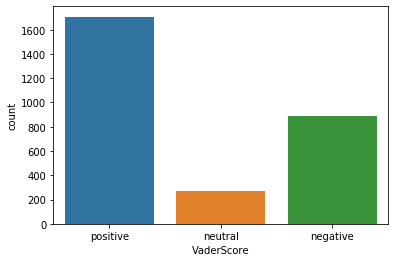

In [24]:
sns.countplot(x='VaderScore',data=tweets) # vander sentiments

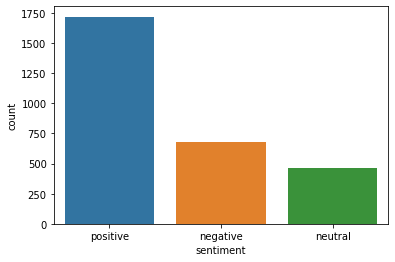

In [25]:
sns.countplot(x='sentiment',data=tweets) # text blob

In [26]:
##labels for vader sentiments
features = tweets.iloc[:, 3].values
labels = tweets.iloc[:,4].values
labels

array(['positive', 'negative', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [27]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2865,min_df=3, max_df=0.6, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(features).toarray()


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=100)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [30]:
predictions = text_classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[133  22  56]
 [  1  99  26]
 [ 25  32 466]]
              precision    recall  f1-score   support

    negative       0.84      0.63      0.72       211
     neutral       0.65      0.79      0.71       126
    positive       0.85      0.89      0.87       523

    accuracy                           0.81       860
   macro avg       0.78      0.77      0.77       860
weighted avg       0.82      0.81      0.81       860

0.8116279069767441


In [32]:
accuracy_rf = accuracy_score(y_test,predictions)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.8116279069767441


In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2005, 2602) (2005,)
(860, 2602) (860,)


In [34]:

##labels for TextBlob Sentiments
features2 = tweets.iloc[:, 3].values
labels2 = tweets.iloc[:,5].values

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer (max_features=2865,min_df=3, max_df=0.6, stop_words=stopwords.words('english'))
processed_features1 = vectorizer.fit_transform(features2).toarray()

In [36]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(processed_features1, labels2, test_size=0.3, random_state=25) #chssnge data partition

# Naive Bayes

In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


In [38]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred = gnb.predict(X_test1)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

Accuracy: 0.5837209302325581


In [40]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

    negative       0.43      0.58      0.50       264
     neutral       0.46      0.29      0.35        73
    positive       0.72      0.63      0.67       523

    accuracy                           0.58       860
   macro avg       0.53      0.50      0.51       860
weighted avg       0.61      0.58      0.59       860



# SVM

In [41]:
from sklearn import svm

In [42]:
lin_clf = svm.LinearSVC()

In [43]:
lin_clf.fit(X_train1, y_train1) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [44]:
lin_clf_pred = lin_clf.predict(X_test1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test1,lin_clf_pred))
print(classification_report(y_test1,lin_clf_pred))
print(accuracy_score(y_test1, lin_clf_pred))

[[191  10  63]
 [ 15  31  27]
 [ 50  13 460]]
              precision    recall  f1-score   support

    negative       0.75      0.72      0.73       264
     neutral       0.57      0.42      0.49        73
    positive       0.84      0.88      0.86       523

    accuracy                           0.79       860
   macro avg       0.72      0.68      0.69       860
weighted avg       0.79      0.79      0.79       860

0.7930232558139535


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [6]:
log_model = log_model.fit(X_train1, y_train1)

NameError: name 'log_model' is not defined

In [48]:
y_pred1 = log_model.predict(X_test1)

In [49]:
accuracy_lr = accuracy_score(y_test1,y_pred1)
print("Accuracy: {}".format(accuracy_lr))

Accuracy: 0.7604651162790698


In [50]:


print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print(accuracy_score(y_test1, y_pred1))

[[161   0 103]
 [  9   1  63]
 [ 31   0 492]]
              precision    recall  f1-score   support

    negative       0.80      0.61      0.69       264
     neutral       1.00      0.01      0.03        73
    positive       0.75      0.94      0.83       523

    accuracy                           0.76       860
   macro avg       0.85      0.52      0.52       860
weighted avg       0.79      0.76      0.72       860

0.7604651162790698


# Multi Nomial Logistic Regression

In [51]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train1, y_train1)

In [52]:
clf_pred1 = clf.predict(X_test1)


In [53]:
print(confusion_matrix(y_test1,clf_pred1))
print(classification_report(y_test1,clf_pred1))
print(accuracy_score(y_test1, clf_pred1))

[[181   1  82]
 [ 11   5  57]
 [ 35   0 488]]
              precision    recall  f1-score   support

    negative       0.80      0.69      0.74       264
     neutral       0.83      0.07      0.13        73
    positive       0.78      0.93      0.85       523

    accuracy                           0.78       860
   macro avg       0.80      0.56      0.57       860
weighted avg       0.79      0.78      0.75       860

0.7837209302325582


# Ensembling -- XGBOOST

In [7]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

In [56]:
# fit model no training data
model_XGB = XGBClassifier(n_estimators=500, max_depth=100, learning_rate=0.01)
model_XGB.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
model_XGB_pred1 = model_XGB.predict(X_test1)

In [58]:
print(confusion_matrix(y_test1,model_XGB_pred1))
print(classification_report(y_test1,model_XGB_pred1))
print(accuracy_score(y_test1, model_XGB_pred1))

[[180   8  76]
 [ 11  50  12]
 [ 53  23 447]]
              precision    recall  f1-score   support

    negative       0.74      0.68      0.71       264
     neutral       0.62      0.68      0.65        73
    positive       0.84      0.85      0.84       523

    accuracy                           0.79       860
   macro avg       0.73      0.74      0.73       860
weighted avg       0.79      0.79      0.79       860

0.7872093023255814
